In [146]:
import numpy as np
from scipy.stats import norm

In [125]:
n_sample = 100

uniform_random_numbers = np.random.rand(n_sample)
monte_carlo_eval = np.mean(np.exp(uniform_random_numbers))

print(f'Estimated value: {monte_carlo_eval}')
print(f'True value: {np.e - 1}')

Estimated value: 1.6120441975703088
True value: 1.718281828459045


In [126]:
y  = (np.exp(uniform_random_numbers) + np.exp(1 - uniform_random_numbers)) / 2

print(f'Estimated value: {np.mean(y)}')
print(f'True value: {np.e - 1}')

Estimated value: 1.7206284127910882
True value: 1.718281828459045


In [127]:
c = - np.cov(np.exp(uniform_random_numbers), uniform_random_numbers)[0, 1] / np.var(uniform_random_numbers)
z = np.exp(uniform_random_numbers) + c * (uniform_random_numbers - 0.5)

print(f'Estimated value: {np.mean(z)}')
print(f'True value: {np.e - 1}')

Estimated value: 1.7228108474386619
True value: 1.718281828459045


In [128]:
W = sum([np.exp(np.random.uniform(i + 0,i + 1/10,size = n_sample)) for i in np.arange(0, 1, 0.1)]) / 10
int_stratified = np.sum(W)/n_sample

exact_int = np.e - 1
error = exact_int - int_stratified

print(f'Estimated integral: {int_stratified}, Exact integral: {exact_int}, Error: {error}')

Estimated integral: 1.7169946274752195, Exact integral: 1.718281828459045, Error: 0.0012872009838256204


In [134]:
# Parameters 
m = 10
mst = 8
mtbc = 1

n_sim = 10
block_fractions = np.zeros(n_sim)

for j in range(n_sim):
    n_custom = 10000
    n = 0
    
    interval_between_arrivals = np.random.exponential(scale = mtbc, size = n_custom)
    arrival_times = np.cumsum(interval_between_arrivals)

    service_in_use_times = np.zeros(m)

    n_cust_blocked = 0


    while(n < n_custom):

        available_services = np.where(arrival_times[n] >= service_in_use_times)[0]
        if (len(available_services)>0):
            i = available_services[0]
            service_time = np.random.exponential(scale=mst)
            service_in_use_times[i] = arrival_times[n] + service_time
        else:
            n_cust_blocked += 1
        n += 1

    fraction = n_cust_blocked / n_custom  * 100
    #print(f'fraction of blocks: {fraction}%')
    block_fractions[j] = fraction

n_sample = n_sim

theta_hat = np.sum(block_fractions)/n_sim


uniform_random_numbers = np.random.exponential(theta_hat, n_sample)

c = - np.cov(block_fractions, uniform_random_numbers)[0, 1] / np.var(uniform_random_numbers)
z = block_fractions + c * (uniform_random_numbers)

print(f'Estimated value: {np.mean(z)}')
print(np.var(z))
print(np.var(block_fractions))

print(np.cov(block_fractions, uniform_random_numbers)[1,1]) # high correlation

Estimated value: 12.297951987961557
0.11962752936743311
0.16539999999999963
141.83623736551505


In [135]:
from scipy.stats import t

# Parameters 
m = 10
mst = 8
mtbc = 1

n_sim = 10
block_fractions_exp = np.zeros(n_sim)
block_fractions_hyp = np.zeros(n_sim)

p1 = 0.8
p2 = 0.2
lam1 = 0.8333
lam2 = 5.0


for j in range(n_sim):
    n_custom = 10000
    n = 0

    uniform_random_numbers = np.random.rand(n_custom)
    
    interval_between_arrivals_exponential = - np.log(uniform_random_numbers) / mtbc

    interval_between_arrivals_hyperexponential = np.zeros(n_custom)
    exps = np.random.choice([0,1], p = [p1,p2], size = n_custom)
    interval_between_arrivals_hyperexponential[exps == 0] = - np.log(uniform_random_numbers[exps == 0]) / lam1
    interval_between_arrivals_hyperexponential[exps == 1] = - np.log(uniform_random_numbers[exps == 1]) / lam2

    arrival_times_exponential = np.cumsum(interval_between_arrivals_exponential)
    arrival_times_hyperexponential = np.cumsum(interval_between_arrivals_exponential)


    service_in_use_times = np.zeros(m)

    n_cust_blocked = 0


    while(n < n_custom):

        available_services = np.where(arrival_times_exponential[n] >= service_in_use_times)[0]
        if (len(available_services)>0):
            i = available_services[0]
            service_time = np.random.exponential(scale=mst)
            service_in_use_times[i] = arrival_times_exponential[n] + service_time
        else:
            n_cust_blocked += 1
        n += 1

    fraction = n_cust_blocked / n_custom  * 100
    #print(f'fraction of blocks: {fraction}%')
    block_fractions_exp[j] = fraction

    service_in_use_times = np.zeros(m)

    n_cust_blocked = 0

    n = 0

    while(n < n_custom):

        available_services = np.where(arrival_times_hyperexponential[n] >= service_in_use_times)[0]
        if (len(available_services)>0):
            i = available_services[0]
            service_time = np.random.exponential(scale=mst)
            service_in_use_times[i] = arrival_times_hyperexponential[n] + service_time
        else:
            n_cust_blocked += 1
        n += 1

    fraction = n_cust_blocked / n_custom  * 100
    #print(f'fraction of blocks: {fraction}%')
    block_fractions_hyp[j] = fraction

n_sample = n_sim


diff = block_fractions_exp - block_fractions_hyp

theta_hat = np.sum(diff)/n_sim
#print(theta_hat)
sigma_2 = (np.sum(diff ** 2) - n_sim * theta_hat**2) / (n_sim -1)

dof = n_sim -1
alpha = 0.95
t_quant = t.ppf(1-alpha/2,dof)
CI = [theta_hat - np.sqrt(sigma_2)/np.sqrt(n)*t_quant, theta_hat + np.sqrt(sigma_2)/np.sqrt(n)*t_quant]

print(f'Confidence interval: {str(CI[0]), str(CI[1])}')
print(f'Widht CI: {np.abs(CI[1] - CI[0])}')

print(np.mean(block_fractions_hyp))
print(np.mean(block_fractions_exp))


Confidence interval: ('-0.2264137604001911', '-0.22558623959980814')
Widht CI: 0.0008275208003829526
12.172999999999998
11.947


In [131]:
from scipy.stats import t

# Parameters 
m = 10
mst = 8
mtbc = 1

n_sim = 10
block_fractions_exp = np.zeros(n_sim)
block_fractions_hyp = np.zeros(n_sim)

p1 = 0.8
p2 = 0.2
lam1 = 0.8333
lam2 = 5.0


for j in range(n_sim):
    n_custom = 10000
    n = 0

    uniform_random_numbers_exp = np.random.rand(n_custom)
    uniform_random_numbers_hyp = np.random.rand(n_custom)

    
    interval_between_arrivals_exponential = - np.log(uniform_random_numbers_exp) / mtbc

    interval_between_arrivals_hyperexponential = np.zeros(n_custom)
    exps = np.random.choice([0,1], p = [p1,p2], size = n_custom)
    interval_between_arrivals_hyperexponential[exps == 0] = - np.log(uniform_random_numbers_hyp[exps == 0]) / lam1
    interval_between_arrivals_hyperexponential[exps == 1] = - np.log(uniform_random_numbers_hyp[exps == 1]) / lam2

    arrival_times_exponential = np.cumsum(interval_between_arrivals_exponential)
    arrival_times_hyperexponential = np.cumsum(interval_between_arrivals_exponential)


    service_in_use_times = np.zeros(m)

    n_cust_blocked = 0


    while(n < n_custom):

        available_services = np.where(arrival_times_exponential[n] >= service_in_use_times)[0]
        if (len(available_services)>0):
            i = available_services[0]
            service_time = np.random.exponential(scale=mst)
            service_in_use_times[i] = arrival_times_exponential[n] + service_time
        else:
            n_cust_blocked += 1
        n += 1

    fraction = n_cust_blocked / n_custom  * 100
    #print(f'fraction of blocks: {fraction}%')
    block_fractions_exp[j] = fraction

    service_in_use_times = np.zeros(m)

    n_cust_blocked = 0

    n = 0

    while(n < n_custom):

        available_services = np.where(arrival_times_hyperexponential[n] >= service_in_use_times)[0]
        if (len(available_services)>0):
            i = available_services[0]
            service_time = np.random.exponential(scale=mst)
            service_in_use_times[i] = arrival_times_hyperexponential[n] + service_time
        else:
            n_cust_blocked += 1
        n += 1

    fraction = n_cust_blocked / n_custom  * 100
    #print(f'fraction of blocks: {fraction}%')
    block_fractions_hyp[j] = fraction

n_sample = n_sim


diff = block_fractions_exp - block_fractions_hyp

theta_hat = np.sum(diff)/n_sim
#print(theta_hat)
sigma_2 = (np.sum(diff ** 2) - n_sim * theta_hat**2) / (n_sim -1)

dof = n_sim -1
alpha = 0.95
t_quant = t.ppf(1-alpha/2,dof)
CI = [theta_hat - np.sqrt(sigma_2)/np.sqrt(n)*t_quant, theta_hat + np.sqrt(sigma_2)/np.sqrt(n)*t_quant]

print(f'Confidence interval: {str(CI[0]), str(CI[1])}')

print(f'Widht CI: {np.abs(CI[1] - CI[0])}')



Confidence interval: ('0.2417040179000302', '0.24229598209996872')
Widht CI: 0.0005919641999385106


In [156]:
n_sample = 1000

z = np.random.randn(n_sample)

a = 0.9

prob = np.sum(z > a) / n_sample
print(prob)

# Importance sampling: sample from N(a, sigma_2)
z_imp = np.random.normal(loc=a, scale=np.sqrt(sigma_2), size=n_sample)
weights = norm.pdf(z_imp) / norm.pdf(z_imp, loc=a, scale=np.sqrt(sigma_2))
prob_imp = np.mean((z_imp > a) * weights)
print(prob_imp)

print(1 - norm.cdf(a))


0.178
0.1778316310024755
0.18406012534675953


In [171]:
lam = 1.3
n_sample = 1000

x = np.random.exponential(1/lam, n_sample)  # scale = 1/λ in NumPy
g = lam * np.exp(- lam * x)

mask = (x > 0) & (x < 1)
res = np.mean(np.exp(x[mask]) / g[mask])

print(res)

2.327217962162419


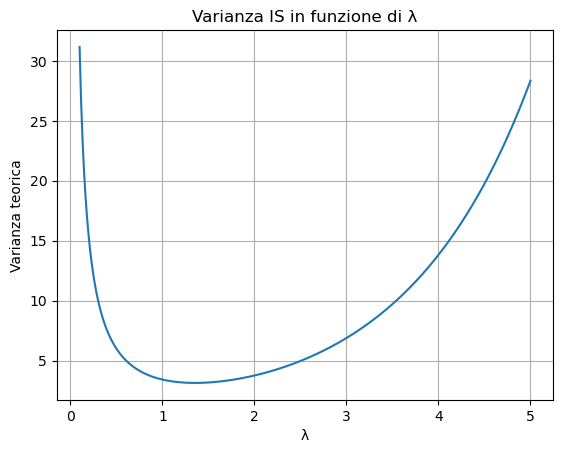

In [172]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

lambdas = np.linspace(0.1, 5, 300)
f = (np.exp(lambdas + 2) - 1) / (lambdas * (lambdas + 2)) - (np.e - 1)**2

plt.plot(lambdas, f)
plt.xlabel("λ")
plt.ylabel("Varianza teorica")
plt.title("Varianza IS in funzione di λ")
plt.grid(True)
plt.show()

In [ ]:
from scipy.stats import pareto

import matplotlib.pyplot as plt

# Parameters for the Pareto distribution
b = 2.62  # shape parameter
size = 1000

# Generate Pareto samples
pareto_samples = pareto.rvs(b, size=size)

mean_par = np.mean(pareto_samples)
print(mean_par)



1.612906837713506
